### Συσχέτιση Math PISA scores με το μέσο όρο διάρκειας των θερινών διακοπών

Με αφορμή το post του @anamorfosis (ΣΓ)

https://x.com/anamorfosis/status/1826630883077701919

έκανα την ακόλουθη ερώτηση στο ChatGPT "I need a table in csv format of PISA math scores and their standard deviations for all countries and also please add a column with the mean number of weeks of summer school break for each country". Τα αποτελέσματα σώθηκαν στο αρχείο math_scores.csv


In [1]:
import csv
        
file = open("math_scores.csv", "r")
data = list(csv.reader(file, delimiter=","))
file.close()

for item in data:
    print(item)

['Country/Region', 'PISA 2018 Math Score', 'Standard Deviation', 'Mean Summer Break (Weeks)']
['China (Beijing/Shanghai/Jiangsu/Zhejiang)', '591', '92', '9']
['Singapore', '569', '82', '6.5']
['Hong Kong (China)', '551', '82', '7.5']
['Macao (China)', '558', '75', '9']
['Taiwan', '531', '91', '8.5']
['Japan', '527', '90', '6.5']
['South Korea', '526', '87', '5']
['Estonia', '523', '83', '12']
['Netherlands', '519', '85', '6.5']
['Poland', '516', '79', '9']
['Switzerland', '515', '90', '5.5']
['Canada', '512', '86', '8.5']
['Finland', '507', '84', '10.5']
['Ireland', '500', '83', '8.5']
['Slovenia', '495', '83', '9']
['Denmark', '509', '86', '6.5']
['Belgium', '508', '91', '8.5']
['Germany', '500', '88', '7']
['Norway', '502', '82', '8.5']
['United Kingdom', '502', '86', '7']
['United States', '478', '92', '10.5']
['France', '495', '86', '8.5']
['Portugal', '492', '84', '11']
['Italy', '487', '88', '12.5']
['Spain', '481', '84', '11']
['Russia', '488', '88', '12.5']
['Australia', '491',

Πάμε να κάνουμε ένα plot των δεδομένων χωρίς τις τυπικές αποκλίσεις καθώς και να υπολογίσουμε το Spearman correlation coefficient $\rho$ που αξιολογεί το πόσο καλά μπορεί να περιγραφεί η σχέση μεταξύ των δύο μεταβλητών χρησιμοποιώντας μια μονότονη συνάρτηση. Θα αποφύγω τη χρήση του Pearson correlation καθώς χάνουμε σε γενικότητα με το να υποθέσουμε μια γραμμική συσχέτηση των δύο μεταβλητών όπως έκανε ο ΣΓ.

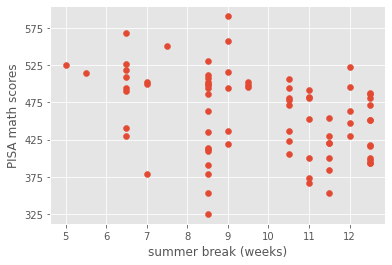

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
%matplotlib inline
plt.style.use('ggplot')

weeks = []
scores = []
sd_scores = []
for item in data[1:]:
    weeks.append(float(item[3]))
    scores.append(float(item[1]))
    sd_scores.append(float(item[2]))

#Plot the results
plt.figure()
plt.yticks(np.arange(min(scores), max(scores)+1, 50.0))
plt.scatter(weeks,scores)
plt.xlabel('summer break (weeks)')
plt.ylabel('PISA math scores');


In [3]:
#Calculate the Spearman correlation coefficient
rho,p = spearmanr(weeks,scores)
print('Spearman correlation coefficient is ' + str(rho) + ' with p-value = ' + str(p))

Spearman correlation coefficient is -0.3812534004655142 with p-value = 0.0005271763592681607


Βρήκαμε ρ=-0.38 δηλαδή αρνητική συσχέτιση που σημαίνει ότι το PISA math score αποτελεί φθίνουσα συνάρτηση του αριθμού των εβδομάδων του school summer break σε γενική συμφωνία με το αποτέλεσμα του regression του ΣΓ. Η τιμή του ρ μπορεί να χαρακτηριστεί ως moderate correlation. Πάμε τώρα να βάλουμε και τις τυπικές αποκλίσεις των PISA scores στο παιχνίδι.

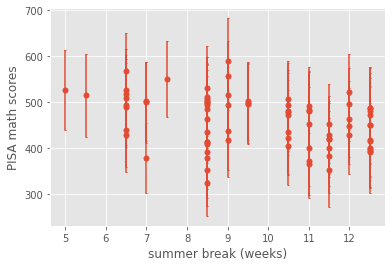

In [4]:
plt.figure()
plt.errorbar(weeks,scores,yerr=sd_scores,marker='o',\
             ms=5,capsize=1,linestyle='')
plt.xlabel('summer break (weeks)')
plt.ylabel('PISA math scores');

Αν και η ανάλυσή μας για τις μέσες τιμές των PISA math scores έδειξε μια μέτρια αρνητική συσχέτιση, αν λάβουμε υπόψη τις τυπικές αποκλίσεις, μπορούμε "με το μάτι" να συμπεράνουμε ότι θα πρέπει να είμαστε πιο μετριοπαθείς. Αλλά πως μπορούμε να ποσοτικοποιήσουμε αυτή την παρατήρηση; Κάτι ανάλογο ρώτησε και ο ΣΓ

https://x.com/anamorfosis/status/1827082604249579849

Ένας σχετικά απλός τρόπος για να γίνει αυτό είναι χρησιμοποιώντας μια στοχαστική προσομοίωση. Ουσιαστικά, γνωρίζοντας ότι τα PISA math scores είναι κανονικά κατανενημένα καθώς και γνωρίζοντας την τυπική απόκλιση των δεδομένων, προσομοιώνουμε πολλές τυχαίες περιπτώσεις του συνόλου των δεδομένων μας από αυτήν την κατανομή. Στη συνέχεια υπολογίζουμε το Spearman correlation coefficient για κάθε σύνολο δεδομένων, λαμβάνοντας τελικά μια κατανομή του συντελεστή συσχέτισης. Αυτή η κατανομή ποσοτικοποιεί την αβεβαιότητά μας για τον συντελεστή συσχέτισης. 



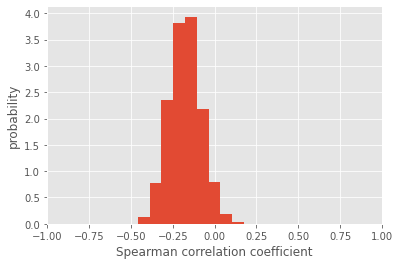

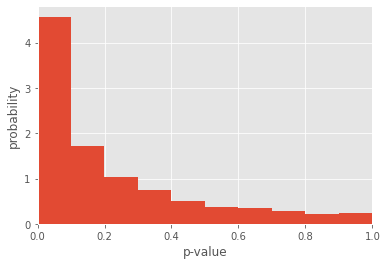

In [5]:
n = 10000 #10,000 simulations
rho_sim = np.zeros(n) #Initialize array of Spearman correlation coefficients
p_sim = np.zeros(n) #Initialize array of p-values

for i in range(n):
    #Generate random weights using mean PISA scores with reported standard deviation
    scores_sim = np.random.normal(scores,sd_scores,79)
    
    #Calculate correlation coefficient and p-value
    rho_sim[i],p_sim[i] = spearmanr(weeks,scores_sim)
    
#Plot results
plt.figure()
plt.hist(rho_sim,density=True)
plt.xlabel('Spearman correlation coefficient')
plt.ylabel('probability')
plt.xlim((-1,1))

plt.figure()
plt.hist(p_sim,density=True)
plt.xlabel('p-value')
plt.ylabel('probability')
plt.xlim((0,1));

As expected λαμβάνοντας υπόψη και τις τυπικές αποκλίσεις των PISA scores βρίσκουμε μέσο ρ=-0.2 το οποίο είναι πολύ πιο κοντά στο μηδέν και πάει προς την κατεύθυνση του "negligable correlation". Σε κάθε περίπτωση αυτό που θέλω να κάνω σαφές με αυτή την ανάλυση είναι ότι είναι κρίμα να μη λαμβάνονται υπόψη οι τυπικές αποκλίσεις των δεδομένων καθώς όπως φαίνεται από τα παραπάνω επηρεάζουν την στατιστική ανάλυση των raw data καθώς και την εμπιστοσύνη που μπορούμε να έχουμε στα συμπεράσματα που προκύπτουν.